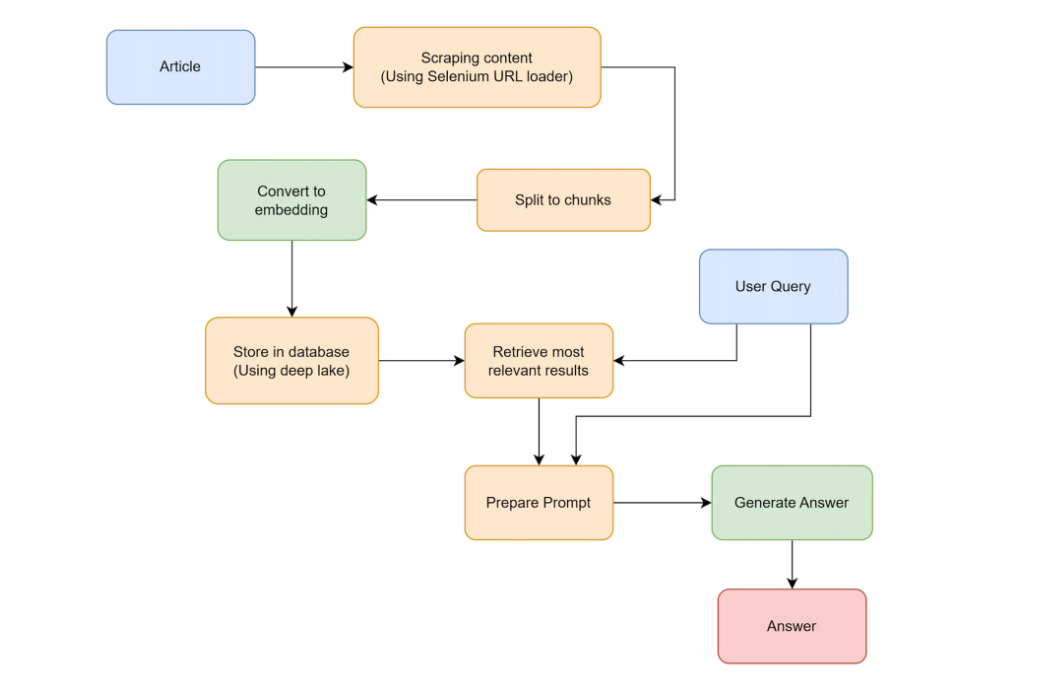

In [2]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import DeepLake
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI
from langchain.document_loaders import SeleniumURLLoader
from langchain import PromptTemplate

In [3]:
# we'll use information from the following articles
urls = ['https://beebom.com/what-is-nft-explained/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-download-gif-twitter/',
        'https://beebom.com/how-use-chatgpt-linux-terminal/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-save-instagram-story-with-music/',
        'https://beebom.com/how-install-pip-windows/',
        'https://beebom.com/how-check-disk-usage-linux/']

In [4]:
# Split the documents into chunks and compute their embeddings
# use the selenium scraper to load the documents
loader = SeleniumURLLoader(urls=urls)
docs_not_splitted = loader.load()

# we split the documents into smaller chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(docs_not_splitted)
print(docs)

Created a chunk of size 1226, which is longer than the specified 1000


[Document(page_content='Home > Internet > NFTs Explained: What is an NFT and What is Its Use\n\nNFTs Explained: What is an NFT and What is Its Use\n\nArjun Sha\n\nUpdated: December 6, 2021\n\nComments\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t2\n\nShare\n\nCopied\n\nAfter Bitcoin and Blockchain, NFT is another word to have entered our lexicon. The buzzword is everywhere and people are wondering what is NFT and what is its use? Well, there is not really a one-line explainer. And that’s why we have brought a comprehensive explainer on NFT, what is its use in digital art, and more. So without wasting any time, let’s go ahead and learn about NFTs (Non-fungible Token) in complete detail.\n\nWhat is NFT: A Definitive Explainer (2021)\n\nHere, we have mentioned all the questions that people have in their minds regarding NFT. You can click on the table to find all the sections that we have covered in this article and click on the link to move to the corresponding section.\n\nTable of Cont

In [5]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "hugo01andres"
my_activeloop_dataset_name = "langchain_course_customer_support"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db.add_documents(docs)

Deep Lake Dataset in hub://hugo01andres/langchain_course_customer_support already exists, loading from the storage


Creating 138 embeddings in 1 batches of size 138:: 100%|██████████| 1/1 [00:16<00:00, 16.82s/it]

Dataset(path='hub://hugo01andres/langchain_course_customer_support', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype       shape      dtype  compression
  -------    -------     -------    -------  ------- 
 embedding  embedding  (276, 1536)  float32   None   
    id        text      (276, 1)      str     None   
 metadata     json      (276, 1)      str     None   
   text       text      (276, 1)      str     None   


['530f6940-dda8-11ee-a1fe-6045bdccd734',
 '530f6ac6-dda8-11ee-a1fe-6045bdccd734',
 '530f6b7a-dda8-11ee-a1fe-6045bdccd734',
 '530f6c24-dda8-11ee-a1fe-6045bdccd734',
 '530f6cba-dda8-11ee-a1fe-6045bdccd734',
 '530f6d5a-dda8-11ee-a1fe-6045bdccd734',
 '530f6df0-dda8-11ee-a1fe-6045bdccd734',
 '530f6e86-dda8-11ee-a1fe-6045bdccd734',
 '530f6f12-dda8-11ee-a1fe-6045bdccd734',
 '530f6fa8-dda8-11ee-a1fe-6045bdccd734',
 '530f7034-dda8-11ee-a1fe-6045bdccd734',
 '530f70ca-dda8-11ee-a1fe-6045bdccd734',
 '530f7160-dda8-11ee-a1fe-6045bdccd734',
 '530f71ec-dda8-11ee-a1fe-6045bdccd734',
 '530f7278-dda8-11ee-a1fe-6045bdccd734',
 '530f7304-dda8-11ee-a1fe-6045bdccd734',
 '530f739a-dda8-11ee-a1fe-6045bdccd734',
 '530f7430-dda8-11ee-a1fe-6045bdccd734',
 '530f74c6-dda8-11ee-a1fe-6045bdccd734',
 '530f7552-dda8-11ee-a1fe-6045bdccd734',
 '530f75de-dda8-11ee-a1fe-6045bdccd734',
 '530f7674-dda8-11ee-a1fe-6045bdccd734',
 '530f7700-dda8-11ee-a1fe-6045bdccd734',
 '530f778c-dda8-11ee-a1fe-6045bdccd734',
 '530f7822-dda8-

In [6]:
# let's see the top relevant documents to a specific query
query = "how to check disk usage in linux?"
docs = db.similarity_search(query)
print(docs[0].page_content)

Check Disk Usage Using Gnome Disk Tool

Check Disk Usage Using Disk Usage Analyzer Tool

Cleanup Disk using Disk Usage Analyzer

Check Disk Space Using the df Command

In Linux, there are many commands to check disk usage, the most common being the df command. The df stands for “Disk Filesystem” in the command, which is a handy way to check the current disk usage and the available disk space in Linux. The syntax for the df command in Linux is as follows:

df <options> <file_system>

The options to use with the df command are:

Options Description -a Show information about all file systems including pseudo, duplicate and inaccessible file systems -h Display the sizes in human-readable format i.e in powers of 1024 -t Display the disk usage of only the file system of a particular type -x Display the disk usage excluding a particular file type

Display Disk Usage in Human Readable Format


In [7]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are an exceptional customer support chatbot that gently answer questions.

You know the following context information.

{chunks_formatted}

Answer to the following question from a customer. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
)

In [8]:
# the full pipeline

# user question
query = "How to check disk usage in linux?"

# retrieve relevant chunks
docs = db.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
#print(f"CHUNKS FORMATTED: {chunks_formatted}")
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)
#print(f"PROMPT FORMATTED: {prompt_formatted}")
# generate answer
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 To check disk usage in Linux, there are several methods you can use. One of the most common methods is by using the df command in the terminal. This command displays the current disk usage and available disk space in a human-readable format. You can also use the Gnome Disk Tool or Disk Usage Analyzer Tool to check disk usage in a graphical interface. Additionally, you can use the df command with different options to display disk usage for a particular type of file system or exclude certain file types.
